# Алгоритм LZ77

In [22]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size

    def encode(self, text: str) -> str:
        output = []
        flag = 0

        while flag < len(text):
            best_o = -1 #offset
            best_l = -1 #length
            best_m = '' #match

            for length in range(1, min(len(text) - flag, self.buffer_size)):
                substring = text[flag:flag + length]
                offset = text.rfind(substring, max(0, flag - self.buffer_size), flag)

                if offset != -1 and length > best_l:
                    best_o = flag - offset
                    best_l = length
                    best_m = substring

            if best_m != '':
                output.append((best_o, best_l, text[flag + best_l]))
                flag += best_l + 1
            else:
                output.append((0, 0, text[flag]))
                flag += 1

        return LZ77._list2text(output)

    def decode(self, code: str) -> str:
        code = LZ77._text2list(code)
        output = ""

        for tup in code:
            offset, length, next_char = tup
            if length > 0:
                start = len(output) - offset
                string = output[start:start + length]
                output += string + next_char
            else:
                output += next_char
        return output
    
    @staticmethod
    def _text2list(text: str) -> list:
        output = []
        text = text.lstrip('[')
        while text != ']':
            temp = text[:text.find(')')]
            o, temp = int(temp[1:temp.find(',')]), temp[temp.find(',')+1:]
            l, temp = int(temp[:temp.find(',')]), temp[temp.find(',')+1:]
            m = temp.strip()[1]
            tup = (o, l, m)
            output.append(tup)
            text = text[1:][text[1:].find('('):]
        return output

    @staticmethod
    def _list2text(text: list) -> str:
        return str(text)

In [25]:
lz77 = LZ77(5)
a = lz77.encode('hello world abcabbca')
print(a)
print(lz77.decode(a))

[(0, 0, 'h'), (0, 0, 'e'), (0, 0, 'l'), (1, 1, 'o'), (0, 0, ' '), (0, 0, 'w'), (3, 1, 'r'), (0, 0, 'l'), (0, 0, 'd'), (0, 0, ' '), (0, 0, 'a'), (0, 0, 'b'), (0, 0, 'c'), (3, 2, 'b'), (4, 1, 'a')]
hello world abcabbca


In [16]:
import random
import string
def str_generator(num):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(num))

In [17]:
lz77 = LZ77(5)
def testing():
    for n in range(10, 18):
        n = 2 ** n
        print(">>> Testing string size:", n)
        message = str_generator(n)
        enc = lz77.encode(message)
        assert lz77.decode(enc) == message
        print('Success!')
testing()

>>> Testing string size: 1024
Success!
>>> Testing string size: 2048
Success!
>>> Testing string size: 4096
Success!
>>> Testing string size: 8192
Success!
>>> Testing string size: 16384
Success!
>>> Testing string size: 32768
Success!
>>> Testing string size: 65536
Success!
>>> Testing string size: 131072
Success!


In [18]:
import time
import matplotlib.pyplot as plt

lz77 = LZ77(5)
def lzw_plot():

    performance = []
    lengths = list(range(1, 10000, 100))

    for i in lengths:
        string = str_generator(i)
        start = time.perf_counter()
        lz77.encode(string)
        end = time.perf_counter()

        performance.append(end-start)
    return lengths, performance

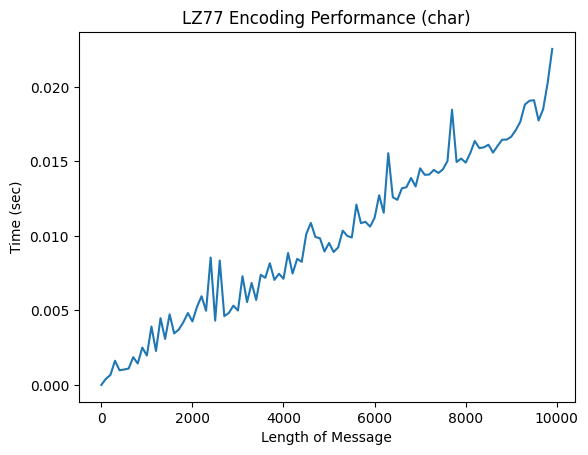

In [19]:
x, y = lzw_plot()
plt.plot(x, y)
plt.xlabel('Length of Message')
plt.ylabel('Time (sec)')
plt.title('LZ77 Encoding Performance (char)')
plt.show()

In [37]:
lz77 = LZ77(5)

def lz77_enc():

    lengths = list(range(1, 100))
    data = [str_generator(i) for i in lengths]
    res = [LZ77(5).encode(i) for i in data]

    return data, res

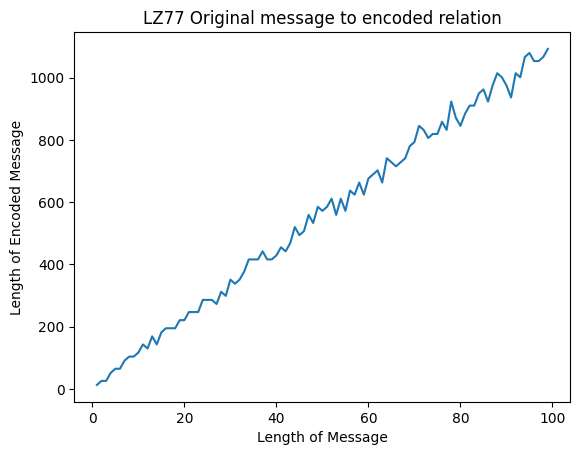

In [38]:
x, y = lz77_enc()
x = [len(i) for i in x]
y = [len(i) for i in y]
plt.plot(x, y)
plt.xlabel('Length of Message')
plt.ylabel('Length of Encoded Message')
plt.title('LZ77 Original message to encoded relation')
plt.show()

In [42]:
def lzw_buffer():

    performance = []
    lengths = list(range(1, 1000))

    for i in lengths:
        string = str_generator(1000)
        start = time.perf_counter()
        LZ77(i).encode(string)
        end = time.perf_counter()

        performance.append(end-start)
    return lengths, performance

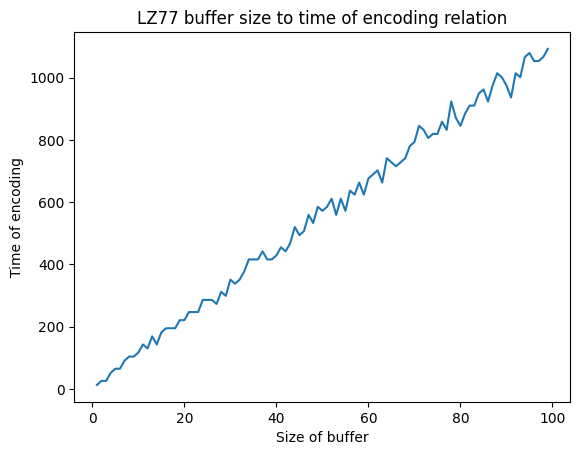

In [43]:
a, b = lzw_buffer()
plt.plot(x, y)
plt.xlabel('Size of buffer')
plt.ylabel('Time of encoding')
plt.title('LZ77 buffer size to time of encoding relation')
plt.show()

### Алгоритм LZ77

Алгоритм LZ77 - це метод стиснення даних, який використовує словник та зсув для заміни повторюваних послідовностей вхідних даних на вказівники на раніше знайдені збіги.

#### Основні ідеї алгоритму:

1. **Словник та вказівники**: Алгоритм підтримує буфер фіксованого розміру для зберігання раніше зчитаних даних. Він використовує вказівники на цей буфер та довжину збігу, щоб зберігати повторювані частини даних.

2. **Пошук найкращого збігу**: Під час кодування алгоритм обчислює найбільш можливий збіг між поточним розглянутим фрагментом даних та попереднім.

3. **Кодування і декодування**: Алгоритм кодує вихідні дані, замінюючи збіги вхідних даних вказівниками на попередні збіги. Під час декодування вказівники відтворюють повторення та відновлюють вихідні дані.

#### Висновок:

- **Стиснення**: LZ77 ефективний для стиснення даних з великою кількістю повторюваних фрагментів, особливо якщо буфер достатньо великий для зберігання часто повторюваних фрагментів даних.
- **Час виконання**: Швидкість кодування та декодування може залежати від розміру буфера та кількості повторюваних фрагментів даних. Великий буфер може призвести до більшого часу обробки, особливо на великих об'ємах даних.

Алгоритм LZ77 є ефективним для деяких типів даних, але може бути менш ефективним для даних без повторень або при обмеженому розмірі буфера. Його ефективність краще проявляється на даних з повторюваними фрагментами та достатньо великим буфером.
